<h1 style="text-align:center;"> Prediction of the flight delay</h1

# Importations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sn

# Data preprocessing

In [3]:
data = pd.read_csv('balance_depDelayClass.csv')
data.drop(columns = data.columns[0], inplace=True)
data = data.drop(['index'], axis=1)
#data = data.fillna(-1)
#data = data.dropna()
values = {"DepTime": -1, "DepDelay": -1, "ArrTime": -1, "ArrDelay": -1, "AirTime": -1, "ActualElapsedTime": -1, "DepDel15": -1, "DepartureDelayGroups": -1, "ArrDel15": -1, "ArrivalDelayGroups": -1, "Tail_Number": 'unknown', "DepDelayClass": -1}
data = data.fillna(value=values)
data = data.fillna(-1)
data

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,2021-06-14,Southwest Airlines Co.,BUR,PHX,False,1930,2101.0,91.0,2220.0,80.0,...,Arizona,1.0,6.0,1900-1959,2100,1.0,5.0,2100-2159,2,5.0
1,2019-03-11,Southwest Airlines Co.,MDW,SFO,False,840,854.0,14.0,1129.0,0.0,...,California,0.0,0.0,0800-0859,1130,0.0,-1.0,1100-1159,8,3.0
2,2019-01-16,SkyWest Airlines Inc.,BIS,DEN,False,1257,1302.0,5.0,1405.0,22.0,...,Colorado,0.0,0.0,1200-1259,1343,1.0,1.0,1300-1359,3,2.0
3,2018-03-05,Southwest Airlines Co.,SFO,SAN,False,1730,1726.0,0.0,1846.0,0.0,...,California,0.0,-1.0,1700-1759,1900,0.0,-1.0,1900-1959,2,0.0
4,2019-08-13,Comair Inc.,CLE,CLT,False,1345,1358.0,13.0,1623.0,53.0,...,North Carolina,0.0,0.0,1300-1359,1530,1.0,3.0,1500-1559,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,2018-11-26,Delta Air Lines Inc.,MCO,JFK,False,728,734.0,6.0,955.0,0.0,...,New York,0.0,0.0,0700-0759,1000,0.0,-1.0,1000-1059,4,2.0
179996,2019-01-17,SkyWest Airlines Inc.,FCA,SLC,False,1405,1415.0,10.0,1616.0,13.0,...,Utah,0.0,0.0,1400-1459,1603,0.0,0.0,1600-1659,3,3.0
179997,2019-05-30,Southwest Airlines Co.,AUS,DAL,False,1530,1534.0,4.0,1623.0,0.0,...,Texas,0.0,0.0,1500-1559,1640,0.0,-2.0,1600-1659,1,1.0
179998,2019-05-28,Comair Inc.,CLT,BNA,False,1139,1130.0,0.0,1214.0,0.0,...,Tennessee,0.0,-1.0,1100-1159,1216,0.0,-1.0,1200-1259,2,0.0


In [4]:
def convertTime(str_time):
    timestamp = datetime.datetime.strptime(str_time,"%Y-%m-%d")
    tuple = timestamp.timetuple()
    timestamp = time.mktime(tuple)

    return(timestamp)

data['Date'] = data['Date'].apply(convertTime)
data

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,1.623622e+09,Southwest Airlines Co.,BUR,PHX,False,1930,2101.0,91.0,2220.0,80.0,...,Arizona,1.0,6.0,1900-1959,2100,1.0,5.0,2100-2159,2,5.0
1,1.552259e+09,Southwest Airlines Co.,MDW,SFO,False,840,854.0,14.0,1129.0,0.0,...,California,0.0,0.0,0800-0859,1130,0.0,-1.0,1100-1159,8,3.0
2,1.547593e+09,SkyWest Airlines Inc.,BIS,DEN,False,1257,1302.0,5.0,1405.0,22.0,...,Colorado,0.0,0.0,1200-1259,1343,1.0,1.0,1300-1359,3,2.0
3,1.520204e+09,Southwest Airlines Co.,SFO,SAN,False,1730,1726.0,0.0,1846.0,0.0,...,California,0.0,-1.0,1700-1759,1900,0.0,-1.0,1900-1959,2,0.0
4,1.565647e+09,Comair Inc.,CLE,CLT,False,1345,1358.0,13.0,1623.0,53.0,...,North Carolina,0.0,0.0,1300-1359,1530,1.0,3.0,1500-1559,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,1.543187e+09,Delta Air Lines Inc.,MCO,JFK,False,728,734.0,6.0,955.0,0.0,...,New York,0.0,0.0,0700-0759,1000,0.0,-1.0,1000-1059,4,2.0
179996,1.547680e+09,SkyWest Airlines Inc.,FCA,SLC,False,1405,1415.0,10.0,1616.0,13.0,...,Utah,0.0,0.0,1400-1459,1603,0.0,0.0,1600-1659,3,3.0
179997,1.559167e+09,Southwest Airlines Co.,AUS,DAL,False,1530,1534.0,4.0,1623.0,0.0,...,Texas,0.0,0.0,1500-1559,1640,0.0,-2.0,1600-1659,1,1.0
179998,1.558994e+09,Comair Inc.,CLT,BNA,False,1139,1130.0,0.0,1214.0,0.0,...,Tennessee,0.0,-1.0,1100-1159,1216,0.0,-1.0,1200-1259,2,0.0


In [5]:

data_original = data.copy()

data["Cancelled"] = LabelEncoder().fit_transform(data["Cancelled"])
data["Airline"] = LabelEncoder().fit_transform(data["Airline"])
data["Origin"] = LabelEncoder().fit_transform(data["Origin"])
data["Destination"] = LabelEncoder().fit_transform(data["Destination"])
data["Operating_Airline"] = LabelEncoder().fit_transform(data["Operating_Airline"])
data["Tail_Number"] = LabelEncoder().fit_transform(data["Tail_Number"])
data["OriginAirportID"] = LabelEncoder().fit_transform(data["OriginAirportID"])
data["OriginCityName"] = LabelEncoder().fit_transform(data["OriginCityName"])
data["OriginStateName"] = LabelEncoder().fit_transform(data["OriginStateName"])
data["DestCityName"] = LabelEncoder().fit_transform(data["DestCityName"])
data["DestStateName"] = LabelEncoder().fit_transform(data["DestStateName"])
data["DepTimeBlk"] = LabelEncoder().fit_transform(data["DepTimeBlk"])
data["ArrTimeBlk"] = LabelEncoder().fit_transform(data["ArrTimeBlk"])

data

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DepDelayClass
0,1.623622e+09,6,53,250,0,1930,2101.0,91.0,2220.0,80.0,...,2,1.0,6.0,14,2100,1.0,5.0,16,2,5.0
1,1.552259e+09,6,206,292,0,840,854.0,14.0,1129.0,0.0,...,4,0.0,0.0,3,1130,0.0,-1.0,6,8,3.0
2,1.547593e+09,5,37,89,0,1257,1302.0,5.0,1405.0,22.0,...,5,0.0,0.0,7,1343,1.0,1.0,8,3,2.0
3,1.520204e+09,6,295,281,0,1730,1726.0,0.0,1846.0,0.0,...,4,0.0,-1.0,12,1900,0.0,-1.0,14,2,0.0
4,1.565647e+09,1,68,69,0,1345,1358.0,13.0,1623.0,53.0,...,31,0.0,0.0,8,1530,1.0,3.0,10,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,1.543187e+09,2,203,168,0,728,734.0,6.0,955.0,0.0,...,30,0.0,0.0,2,1000,0.0,-1.0,5,4,2.0
179996,1.547680e+09,5,119,302,0,1405,1415.0,10.0,1616.0,13.0,...,45,0.0,0.0,9,1603,0.0,0.0,11,3,3.0
179997,1.559167e+09,6,24,84,0,1530,1534.0,4.0,1623.0,0.0,...,42,0.0,0.0,10,1640,0.0,-2.0,11,1,1.0
179998,1.558994e+09,1,70,40,0,1139,1130.0,0.0,1214.0,0.0,...,41,0.0,-1.0,6,1216,0.0,-1.0,7,2,0.0


Text(0.5, 1.0, 'The distribution of delayed flights over the delay classes')

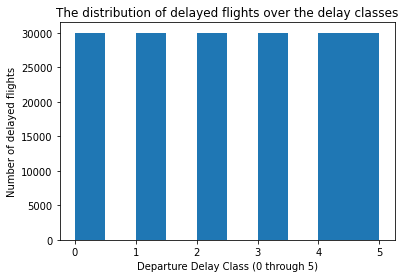

In [6]:

data['DepDelayClass'].plot.hist()
plt.xlabel("Departure Delay Class (0 through 5)")
plt.ylabel("Number of delayed flights")
plt.title("The distribution of delayed flights over the delay classes")

## Feature selection for classification

In [8]:
print("The correlation between the 'DepDelayClass'and 'Deptime' Features : " + str(data["DepDelayClass"].corr(data["DepTime"])))
print("The correlation between the 'DepDelayClass'and 'DepDelay' Features : " + str(data["DepDelayClass"].corr(data["DepDelay"])))
print("The correlation between the 'DepDelayClass'and 'ArrTime' Features : " + str(data["DepDelayClass"].corr(data["ArrTime"])))
print("The correlation between the 'DepDelayClass'and 'ArrDelay' Features : " + str(data["DepDelayClass"].corr(data["ArrDelay"])))
print("The correlation between the 'DepDelayClass'and 'DepDel15' Features : " + str(data["DepDelayClass"].corr(data["DepDel15"])))
print("The correlation between the 'DepDelayClass'and 'DepartureDelayGroups' Features : " + str(data["DepDelayClass"].corr(data["DepartureDelayGroups"])))
print("The correlation between the 'DepDelayClass'and 'ArrDel15' Features : " + str(data["DepDelayClass"].corr(data["ArrDel15"])))
print("The correlation between the 'DepDelayClass'and 'ArrivalDelayGroups' Features : " + str(data["DepDelayClass"].corr(data["ArrivalDelayGroups"])))

The correlation between the 'DepDelayClass'and 'Deptime' Features : 0.21156955906973512
The correlation between the 'DepDelayClass'and 'DepDelay' Features : 0.4440650510922929
The correlation between the 'DepDelayClass'and 'ArrTime' Features : 0.09677391247393051
The correlation between the 'DepDelayClass'and 'ArrDelay' Features : 0.3817013064035778
The correlation between the 'DepDelayClass'and 'DepDel15' Features : 0.8280786712108252
The correlation between the 'DepDelayClass'and 'DepartureDelayGroups' Features : 0.6464108040726272
The correlation between the 'DepDelayClass'and 'ArrDel15' Features : 0.5445264688793571
The correlation between the 'DepDelayClass'and 'ArrivalDelayGroups' Features : 0.5777769328305397


## Generating x and y

In [58]:
data = data.drop(['DepTime','DepDelay','ArrTime', 'ArrDelay','DepDel15', 'DepartureDelayGroups','ArrDel15', 'ArrivalDelayGroups'], axis=1)

y = data['DepDelayClass']  #target variable
X = data.drop('DepDelayClass',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test sample size of 20%
#X_train = X_train.fillna('unknown')
#X_train.to_csv('x_train.csv')


# Classification

## I. Random Forest Classification

### I.1. Basic training

In [59]:
#Initializing the model
forest = RandomForestClassifier(max_depth=20)

#Fitting the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [60]:
y_test_predict = forest.predict(X_test)
y_train_predict = forest.predict(X_train)

In [61]:
acc_train = accuracy_score(y_train,y_train_predict)
acc_test = accuracy_score(y_test,y_test_predict)
f1score_train = f1_score(y_test, y_test_predict, average=None)

print("Accuracy score on training data : " + str(acc_train))
print("Accuracy score on test data : " + str(acc_test))
print("\nF1 Score on training data : " + str(f1score_train))

Accuracy score on training data : 0.9775763888888889
Accuracy score on test data : 0.23058333333333333

F1 Score on training data : [0.35050959 0.21376628 0.16726207 0.16987296 0.17963649 0.26584835]


### I.2. Feature importance

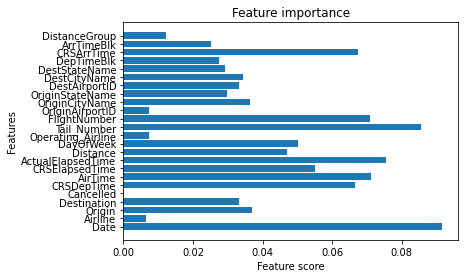

In [62]:
plt.figure()
n = len(X_train.columns)
plt.barh(range(n), forest.feature_importances_, align='center')
plt.yticks(np.arange(n), X_train.columns)
plt.xlabel("Feature score")
plt.ylabel("Features")
plt.title("Feature importance")
plt.show()

### I.3 Parameters tuning

In [ ]:
X=[i for i in range(1,30)]
Y=[]
for i in range(1,30):
  forest = RandomForestClassifier(max_depth = i)
  forest.fit(X_train, y_train)
    
  y_test_forest = forest.predict(X_test)
  y_train_forest = forest.predict(X_train)
    
  acc_test_forest = accuracy_score(y_test,y_test_forest)
  Y = Y + [acc_test_forest]

plt.title("Effect of parametre on accuracy score")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.plot(X,Y)

## II. Decision Tree Classifier

### II.1. Basic training

In [67]:
# initializing the model
dt = DecisionTreeClassifier(max_depth = 20)

# training the model on the training set
dt.fit(X_train, y_train)

# predictions of the testing set
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

In [68]:
acc_train = accuracy_score(y_train,y_train_predict)
acc_test = accuracy_score(y_test,y_test_predict)
f1score_train = f1_score(y_test, y_test_predict, average=None)

print("Accuracy score on training data : " + str(acc_train))
print("Accuracy score on test data : " + str(acc_test))
print("\nF1 Score on training data : " + str(f1score_train))

Accuracy score on training data : 0.6411180555555556
Accuracy score on test data : 0.2061388888888889

F1 Score on training data : [0.27719326 0.19748744 0.18103811 0.17466655 0.17498722 0.22606671]


### II.2. Feature importance

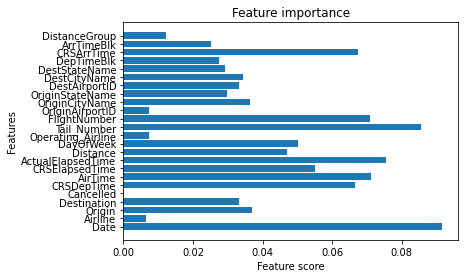

In [69]:
plt.figure()
n = len(X_train.columns)
plt.barh(range(n), forest.feature_importances_, align='center')
plt.yticks(np.arange(n), X_train.columns)
plt.xlabel("Feature score")
plt.ylabel("Features")
plt.title("Feature importance")
plt.show()

### II.3. Parameter tuning

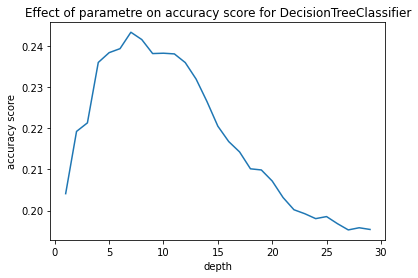

In [70]:
X=[i for i in range(1,30)]
Y=[]
for i in range(1,30):
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(X_train, y_train)
    
  y_test_tree = tree.predict(X_test)
  y_train_tree = tree.predict(X_train)
    
  acc_test = accuracy_score(y_test,y_test_tree)
  Y = Y + [acc_test]

plt.title("Effect of parametre on accuracy score for DecisionTreeClassifier")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.plot(X,Y)

### II.4. Comparison with Random Forest

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestClassifier fit on multiclass (6 classes) data

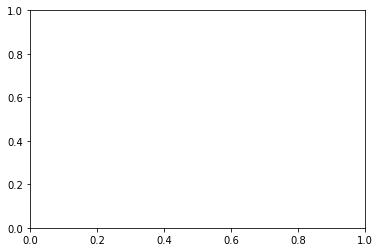

In [72]:
#Decision Tree model
tree = DecisionTreeClassifier(max_depth = 8)
tree.fit(X_train, y_train)
# Random Forest model
forest = RandomForestClassifier(max_depth=8)
forest.fit(X_train, y_train)
#Comparing the true positive and the false positive rates
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(forest, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax, alpha=0.8)
plt.title("ROC comparison between DecisionTree and RandomForest")
plt.show()

## III. KNN

### III.1. Basic training

In [73]:
#Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model
knn.fit(X_train, y_train)

#Predicting the test data
y_pred = knn.predict(X_test)


In [75]:
print("f1 score : " + str(f1_score(y_test, y_pred, average=None)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : [0.2880094  0.1973623  0.17521988 0.15703518 0.15583931 0.20207558]
accuracy score : 0.20127777777777778


### III.2. Parameters Tuning

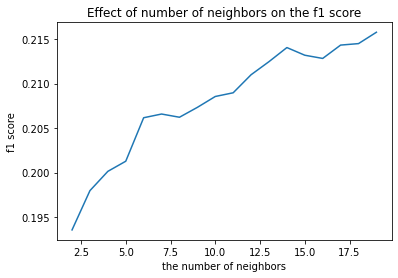

In [78]:
Y=[]
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test,y_pred, average='micro')
    Y = Y + [score]
plt.title("Effect of number of neighbors on the f1 score")
plt.xlabel("the number of neighbors")
plt.ylabel("f1 score")
plt.plot(range(2,20),Y)

## IV. Naive bayes

### Gaussian Naive Bayes

In [79]:
#Initializing the model
nb = GaussianNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

In [81]:
print("f1 score : " + str(f1_score(y_test, y_pred, average=None)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : [0.25610681 0.26653494 0.08153846 0.12410033 0.11571595 0.24642596]
accuracy score : 0.20425


### Multinomial  Naive Bayes

In [83]:
#Initializing the model
nb = MultinomialNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [85]:
print("f1 score : " + str(f1_score(y_test, y_pred, average=None)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : [0.25610681 0.26653494 0.08153846 0.12410033 0.11571595 0.24642596]
accuracy score : 0.20425


### Bernoulli Naive Bayes

In [86]:
#Initializing the model
nb = BernoulliNB()

#Train the model
nb.fit(X_train, y_train)

#Predictions for the testing set
y_pred = nb.predict(X_test)

In [88]:
print("f1 score : " + str(f1_score(y_test, y_pred, average=None)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

f1 score : [0.16240112 0.00197466 0.28129574 0.         0.12269115 0.01806452]
accuracy score : 0.17780555555555555


## V. SVC

### V.1. rbf SVC

In [ ]:
#Initializing the model
#model = SVC()

#Training the model
#model.fit(X_train, y_train)

#Prediction on the testing set
#y_pred = model.predict(X_test)

In [ ]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))

### V.2. linear SVC

In [ ]:
#Initializing the model
#model = SVC(kernel = 'linear')

#Training the model
#model.fit(X_train, y_train)

#Prediction on the testing set
#y_pred = model.predict(X_test)

In [ ]:
print("f1 score : " + str(f1_score(y_test, y_pred)))
print("accuracy score : " + str(accuracy_score(y_test, y_pred)))